Use library is NLTK for task

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np



In [25]:
# Step 1: Prepare the text data
text = [
    "The quick brown fox jumps over the lazy dog.",
    "A dog barks loudly in the night.",
    "The fox hunts for small animals.",
    "Dogs and foxes are both canines.",
    "The lazy dog sleeps all day.",
    "A quick fox can catch its prey easily.",
    "Barking dogs are common in the neighborhood.",
    "Foxes are known for their cunning nature."
]
labels = [f"Sentence {i+1}" for i in range(len(text))]

# Step 2: Create TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Step 3: Fit the vectorizer to the text (build vocabulary)
vectorizer.fit(text)





TfidfVectorizer()

In [26]:

# Step 4: Print vocabulary
print("Vocabulary:")
print(vectorizer.vocabulary_)



Vocabulary:
{'the': 35, 'quick': 32, 'brown': 7, 'fox': 18, 'jumps': 23, 'over': 30, 'lazy': 25, 'dog': 14, 'barks': 5, 'loudly': 26, 'in': 21, 'night': 29, 'hunts': 20, 'for': 17, 'small': 34, 'animals': 2, 'dogs': 15, 'and': 1, 'foxes': 19, 'are': 3, 'both': 6, 'canines': 9, 'sleeps': 33, 'all': 0, 'day': 13, 'can': 8, 'catch': 10, 'its': 22, 'prey': 31, 'easily': 16, 'barking': 4, 'common': 11, 'neighborhood': 28, 'known': 24, 'their': 36, 'cunning': 12, 'nature': 27}


In [27]:
# Step 5: Print IDF values
print("IDF Values:")
print(vectorizer.idf_)



IDF Values:
[2.5040774  2.5040774  2.5040774  1.81093022 2.5040774  2.5040774
 2.5040774  2.5040774  2.5040774  2.5040774  2.5040774  2.5040774
 2.5040774  2.5040774  1.81093022 2.09861229 2.5040774  2.09861229
 1.81093022 2.09861229 2.5040774  2.09861229 2.5040774  2.5040774
 2.5040774  2.09861229 2.5040774  2.5040774  2.5040774  2.5040774
 2.5040774  2.5040774  2.09861229 2.5040774  2.5040774  1.40546511
 2.5040774 ]


In [28]:
# Step 6: Transform the text to TF-IDF features
tfidf_matrix = vectorizer.transform(text)


In [29]:
# Step 7: Print the TF-IDF matrix
print("TF-IDF Matrix:")
print(tfidf_matrix.toarray())



TF-IDF Matrix:
[[0.         0.         0.         0.         0.         0.
  0.         0.38602088 0.         0.         0.         0.
  0.         0.         0.27916744 0.         0.         0.
  0.27916744 0.         0.         0.         0.         0.38602088
  0.         0.32351562 0.         0.         0.         0.
  0.38602088 0.         0.32351562 0.         0.         0.43332437
  0.        ]
 [0.         0.         0.         0.         0.         0.46930222
  0.         0.         0.         0.         0.         0.
  0.         0.         0.33939588 0.         0.         0.
  0.         0.         0.         0.39331188 0.         0.
  0.         0.         0.46930222 0.         0.         0.46930222
  0.         0.         0.         0.         0.         0.26340555
  0.        ]
 [0.         0.         0.46930222 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.39331188
  0.33939

In [30]:
# Step 8: Get feature names to understand the matrix
print("Feature Names:")
print(vectorizer.get_feature_names_out())

Feature Names:
['all' 'and' 'animals' 'are' 'barking' 'barks' 'both' 'brown' 'can'
 'canines' 'catch' 'common' 'cunning' 'day' 'dog' 'dogs' 'easily' 'for'
 'fox' 'foxes' 'hunts' 'in' 'its' 'jumps' 'known' 'lazy' 'loudly' 'nature'
 'neighborhood' 'night' 'over' 'prey' 'quick' 'sleeps' 'small' 'the'
 'their']



Visualizing with PCA:


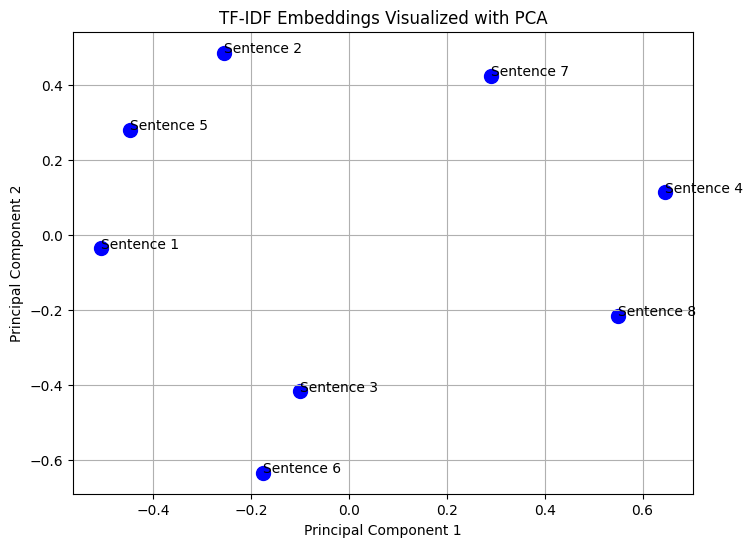

In [31]:
# Visualization using PCA
def visualize_with_pca(matrix, labels):
    # Convert sparse matrix to dense if needed
    if hasattr(matrix, "toarray"):
        matrix = matrix.toarray()

    # Apply PCA to reduce to 2 dimensions
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(matrix)

    # Plot the results
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c='blue', s=100)

    # Add labels
    for i, label in enumerate(labels):
        plt.annotate(label, (reduced_data[i, 0], reduced_data[i, 1]))

    plt.title("TF-IDF Embeddings Visualized with PCA")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.grid()
    plt.show()

# Visualize the embeddings
print("\nVisualizing with PCA:")
visualize_with_pca(tfidf_matrix, labels)

In [23]:
pip install gradio

In [32]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import gradio as gr

# Default example text
default_text = """Cat sit on Mat.
Mat is with Cat.
The thing that Cat has is Mat.
Dog like biscuit.
Biscuit is eaten by Dog."""

# Function to compute TF-IDF and plot PCA
def tfidf_pca_visualization(text_input):
    # Split sentences by newline
    sentences = [s.strip() for s in text_input.strip().split('\n') if s.strip()]
    if len(sentences) < 2:
        raise ValueError("Please enter at least two sentences.")

    # Generate labels
    labels = [f"Sentence {i+1}" for i in range(len(sentences))]

    # TF-IDF
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(sentences)

    # PCA to 2D
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(tfidf_matrix.toarray())

    # Plot
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(reduced[:, 0], reduced[:, 1], c='blue', s=100)

    for i, label in enumerate(labels):
        ax.annotate(label, (reduced[i, 0], reduced[i, 1]))

    ax.set_title("TF-IDF Embeddings with PCA")
    ax.set_xlabel("PCA Component 1")
    ax.set_ylabel("PCA Component 2")
    ax.grid(True)

    return fig

# Gradio Interface
interface = gr.Interface(
    fn=tfidf_pca_visualization,
    inputs=gr.Textbox(lines=10, label="Enter sentences (one per line)", value=default_text),
    outputs=gr.Plot(label="PCA Visualization"),
    title="TF-IDF + PCA Text Embedding Visualizer",
    description="Enter multiple sentences. Each will be vectorized using TF-IDF and projected into 2D using PCA."
)

interface.launch()



It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://36427845818dec00bd.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
